In [12]:
cd\

/Users/qiji


The file contains 1000 rows, 5 features, and a boolean column y. 
Some features may be invalid (not a number, too large, too small). This is intentional.
Your goal is to predict y using different techniques.

In [13]:
cd Downloads

/Users/qiji/Downloads


In [14]:
#import csv
#with open('assignment1.csv') as myfile:
 #   reader= csv.reader(myfile)
  #  for row in reader:
   #     print row

In [15]:
import pandas as pd
import csv
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
a=pd.read_csv('assignment1.csv')

In [18]:
a

,Unnamed: 0,feature-0,feature-1,feature-2,feature-3,feature-4,y
0,0,-7.162092,0.841622,-1.956461,10.646151,8.906107,0
1,1,-6.394505,1.791209,-2.172560,11.322841,4.095095,0
2,2,-3.453066,3.045369,-2.037995,10.890941,8.186939,1
3,3,-3.383163,3.991282,-2.144409,11.108809,5.004489,1
4,4,-6.526678,0.581722,-2.074410,10.413982,3.540979,0
5,5,-7.388080,1.784913,-2.105123,10.254841,6.846642,0
6,6,-3.559081,4.925394,-2.118593,12.210190,3.581018,1
7,7,-3.872134,3.540440,-2.054114,11.030161,7.178489,1
8,8,-8.126050,5.408855,NaN,11.050592,5.587428,1
9,9,-7.954494,1.972780,-2.051398,11.041184,1.291840,0


In [19]:
df=pd.DataFrame.from_csv('assignment1.csv')

In [20]:
df

,feature-0,feature-1,feature-2,feature-3,feature-4,y
0,-7.162092,0.841622,-1.956461,10.646151,8.906107,0
1,-6.394505,1.791209,-2.172560,11.322841,4.095095,0
2,-3.453066,3.045369,-2.037995,10.890941,8.186939,1
3,-3.383163,3.991282,-2.144409,11.108809,5.004489,1
4,-6.526678,0.581722,-2.074410,10.413982,3.540979,0
5,-7.388080,1.784913,-2.105123,10.254841,6.846642,0
6,-3.559081,4.925394,-2.118593,12.210190,3.581018,1
7,-3.872134,3.540440,-2.054114,11.030161,7.178489,1
8,-8.126050,5.408855,NaN,11.050592,5.587428,1
9,-7.954494,1.972780,-2.051398,11.041184,1.291840,0


In [21]:
dfd=df.dropna(axis=0, how='any') #new dataset for histogram

# - for each feature column compute mean and standard deviation

In [22]:
dfd.describe()

,feature-0,feature-1,feature-2,feature-3,feature-4,y
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,-0.462326,7.448389,1.034044,20.263706,9.771290,0.510769
std,71.879889,71.324755,55.526649,94.618835,63.640948,0.500141
min,-8.144376,-0.983165,-2.186969,9.834473,1.234882,0.000000
25%,-6.849377,0.607802,-2.118624,10.492971,3.577070,0.000000
50%,-5.546645,2.365566,-2.051398,11.199594,5.631779,1.000000
75%,-4.363439,4.018560,-1.978980,11.771324,7.878383,1.000000
max,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000


In [29]:
dfd.mean()

feature-0    -0.462326
feature-1     7.448389
feature-2     1.034044
feature-3    20.263706
feature-4     9.771290
y             0.510769
dtype: float64

In [30]:
dfd.std()

feature-0    71.879889
feature-1    71.324755
feature-2    55.526649
feature-3    94.618835
feature-4    63.640948
y             0.500141
dtype: float64

all columns, except Y, have missing value and max number is 1000, that is outlier

# - plots the distribution of each column and look for outliers# 

In [31]:
dfd.columns

Index([u'feature-0', u'feature-1', u'feature-2', u'feature-3', u'feature-4',
       u'y'],
      dtype='object')

(array([ 970.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    5.]),
 array([   -8.14437557,    92.67006199,   193.48449954,   294.2989371 ,
          395.11337466,   495.92781221,   596.74224977,   697.55668733,
          798.37112489,   899.18556244,  1000.        ]),
 <a list of 10 Patch objects>)

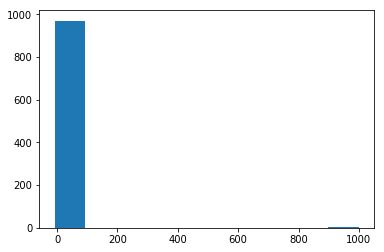

In [32]:
plt.hist(dfd['feature-0'])

(array([ 970.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    5.]),
 array([ -9.83164699e-01,   9.91151518e+01,   1.99213468e+02,
          2.99311785e+02,   3.99410101e+02,   4.99508418e+02,
          5.99606734e+02,   6.99705051e+02,   7.99803367e+02,
          8.99901684e+02,   1.00000000e+03]),
 <a list of 10 Patch objects>)

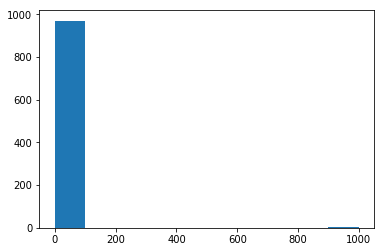

In [33]:
plt.hist(dfd['feature-1'])

(array([ 972.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    3.]),
 array([   -2.18696907,    98.03172783,   198.25042474,   298.46912165,
          398.68781856,   498.90651546,   599.12521237,   699.34390928,
          799.56260619,   899.78130309,  1000.        ]),
 <a list of 10 Patch objects>)

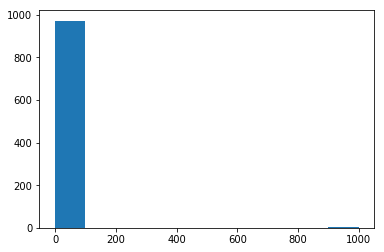

In [34]:
plt.hist(dfd['feature-2'])

(array([ 966.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    9.]),
 array([    9.83447288,   108.85102559,   207.86757831,   306.88413102,
          405.90068373,   504.91723644,   603.93378915,   702.95034186,
          801.96689458,   900.98344729,  1000.        ]),
 <a list of 10 Patch objects>)

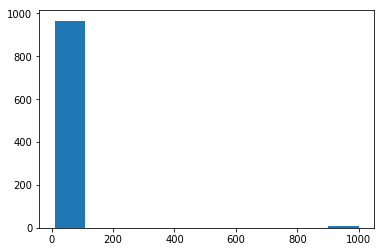

In [35]:
plt.hist(dfd['feature-3'])

(array([ 971.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    4.]),
 array([    1.23488197,   101.11139377,   200.98790558,   300.86441738,
          400.74092918,   500.61744099,   600.49395279,   700.37046459,
          800.24697639,   900.1234882 ,  1000.        ]),
 <a list of 10 Patch objects>)

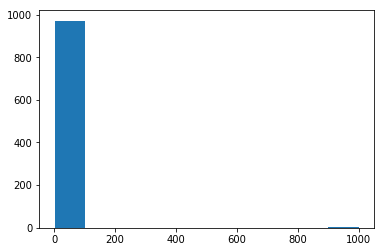

In [36]:
plt.hist(dfd['feature-4'])

(array([ 477.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  498.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

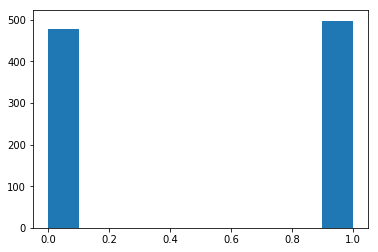

In [37]:
plt.hist(dfd['y'])

# remove outlier

In [41]:
df1=df[df['feature-0']<800]

In [44]:
df1=df1[df1['feature-1']<800]

In [46]:
df1=df1[df1['feature-2']<800]

In [48]:
df1=df1[df1['feature-3']<800]

In [50]:
df1=df1[df1['feature-4']<800]

In [51]:
df1.describe()

,feature-0,feature-1,feature-2,feature-3,feature-4,y
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,-5.617129,2.338361,-2.049596,11.137750,5.709771,0.507903
std,1.422203,1.970420,0.080008,0.729579,2.584973,0.500201
min,-8.144376,-0.983165,-2.186969,9.834473,1.234882,0.000000
25%,-6.852545,0.620442,-2.118654,10.492452,3.581018,0.000000
50%,-5.580114,2.365566,-2.052250,11.168348,5.592066,1.000000
75%,-4.404807,3.996273,-1.979733,11.745866,7.873133,1.000000
max,-3.174675,5.751597,-1.908106,12.362388,10.187514,1.000000


In [54]:
df1.mean()

feature-0    -5.617129
feature-1     2.338361
feature-2    -2.049596
feature-3    11.137750
feature-4     5.709771
y             0.507903
dtype: float64

In [55]:
df1.std()

feature-0    1.422203
feature-1    1.970420
feature-2    0.080008
feature-3    0.729579
feature-4    2.584973
y            0.500201
dtype: float64

In [56]:
df1.corr()

,feature-0,feature-1,feature-2,feature-3,feature-4,y
feature-0,1.000000,0.015216,0.004381,0.037195,0.036908,0.382676
feature-1,0.015216,1.000000,0.007266,0.015416,-0.004782,0.371125
feature-2,0.004381,0.007266,1.000000,0.020352,-0.069644,0.364874
feature-3,0.037195,0.015416,0.020352,1.000000,0.007722,0.380721
feature-4,0.036908,-0.004782,-0.069644,0.007722,1.000000,0.326391
y,0.382676,0.371125,0.364874,0.380721,0.326391,1.000000


# - answer question: is correalation large or small?

Y and other features have very weak correaltion

# - answer question: does small correlation imply they are independent?

No, weak  correaltion doesn't imply they are independent.If X and Y are independent, then they are uncorrelated. But uncorrealted variables may not independent. 

# - split the dataset in two parts [:n] for training and [n:] for testing (n = 50%)

In [89]:
df1 = df1.sample(frac=1)

In [90]:
len(df1)

949

In [91]:
n=int(949/2)

In [92]:
df1_train, df1_test = df1.iloc[:n], df1.iloc[n:]
print len(df1_train), len(df1_test)

474 475


# - run KNeighborsClassifier fit/predict

In [93]:
X_train, y_train = df1_train[df1_train.columns.drop('y')], df1_train['y']

In [94]:
X_test, y_test = df1_test[df1_test.columns.drop('y')], df1_test['y']

# - remove all rows that have invalid numbers and/or impute missing numbers

# - normalize each column to have mean 0 and standard deviation 1

In [95]:
mypipeline = Pipeline([
    ('mybestimputer',Imputer()),
    ('mysuperscaler',StandardScaler()),
    ('knn',KNeighborsClassifier())    
])

In [96]:
mypipeline.fit(X_train, y_train)
yk_pred = mypipeline.predict(X_test)

In [97]:
yk_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0,

In [98]:
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, yk_pred).ravel()

In [99]:
tpr = float(tp)/(tp+fn) 
tnr = float(tn)/(tn+fp) 
ppv = float(tp)/(tp+fp) 
npv = float(tn)/(tn+fn) 
f1=2.0/(1.0/ppv+1.0/tpr)

In [100]:
 dt1 = pd.DataFrame({'tpr':[tpr],
                    'tnr':[tnr],
                     'ppv':[ppv],
                     'npv':[npv],
                     'f1':[f1]
                    })

In [101]:
dt1

,f1,npv,ppv,tnr,tpr
0,0.92,0.927602,0.905512,0.895197,0.934959


# - run LogisticRegression fit/predict

In [102]:
mypipeline = Pipeline([
    ('mybestimputer',Imputer()),
    ('mysuperscaler',StandardScaler()),
    ('masteralg',LogisticRegression())    
])

In [103]:
mypipeline.fit(X_train, y_train)
yr_pred = mypipeline.predict(X_test)

In [104]:
yr_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1,

In [105]:
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, yr_pred).ravel()

In [106]:
tpr = float(tp)/(tp+fn) # recall or true positive rate
tnr = float(tn)/(tn+fp) # true negative rate
ppv = float(tp)/(tp+fp) # precision or positive predictive power
npv = float(tn)/(tn+fn) # negative predictive power
f1=2.0/(1.0/ppv+1.0/tpr)

In [107]:
 dt2 = pd.DataFrame({'tpr':[tpr],
                    'tnr':[tnr],
                     'ppv':[ppv],
                     'npv':[npv],
                     'f1':[f1]
                    })

In [108]:
dt2

,f1,npv,ppv,tnr,tpr
0,0.973843,0.982143,0.964143,0.960699,0.98374


In [109]:
df = df.sample(frac=1)

In [110]:
len(df)

1000

In [111]:
n=int(1000/2)

In [112]:
df_train, df_test = df.iloc[:n], df.iloc[n:]
print len(df_train), len(df_test)

500 500


In [113]:
Xw_train, yw_train = df_train[df_train.columns.drop('y')], df_train['y']

In [114]:
Xw_test, yw_test = df_test[df_test.columns.drop('y')], df_test['y']

In [120]:
mypipeline = Pipeline([
    ('mybestimputer',Imputer()),
    ('mysuperscaler',StandardScaler()),
    ('masteralg',LogisticRegression())    
])

In [121]:
mypipeline.fit(Xw_train, yw_train)
yw_pred = mypipeline.predict(Xw_test)

In [122]:
yw_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0,

In [123]:
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(yw_test, yw_pred).ravel()

In [124]:
tpr = float(tp)/(tp+fn) # recall or true positive rate
tnr = float(tn)/(tn+fp) # true negative rate
ppv = float(tp)/(tp+fp) # precision or positive predictive power
npv = float(tn)/(tn+fn) # negative predictive power
f1=2.0/(1.0/ppv+1.0/tpr)

In [125]:
 dt3 = pd.DataFrame({'tpr':[tpr],
                    'tnr':[tnr],
                     'ppv':[ppv],
                     'npv':[npv],
                     'f1':[f1]
                    })

In [126]:
dt3

,f1,npv,ppv,tnr,tpr
0,0.692737,0.689815,0.65493,0.603239,0.735178


# - Answer question: are results better after removing outliers? why?

If we remove the outliers, the result will be better than the result from the data with outliers.Because outliers  will have big effect on mean. When the mean is no longer presentative of the dataset. and standard deviation will be increased. Thus, the result will skew if there are outliers